# Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Input, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

# Read Data

In [2]:
PATH = "../../Datasets/"

In [3]:
df = pd.read_csv(f"{PATH}RawData/boards.csv")
df

,id,site_id,name,url,db_created_on,db_updated_on
0,212,1019,Tor,http://dreadditevelidot.onion/d/Tor,2020-12-19 20:09:12.398677,2020-12-19 20:09:12.398677
1,91,1019,cryptomining,http://dreadditevelidot.onion/d/cryptomining,2020-12-19 20:09:05.216458,2020-12-19 20:09:05.216458
2,94,1019,CannabisCollective,http://dreadditevelidot.onion/d/CannabisCollec...,2020-12-19 20:09:05.460266,2020-12-19 20:09:05.460266
3,100,1019,DNMSourcing,http://dreadditevelidot.onion/d/DNMSourcing?p=71,2020-12-19 20:09:05.654273,2020-12-19 20:09:05.654273
4,9,1019,murderhomelesspeople,http://dreadditevelidot.onion/d/murderhomeless...,2020-12-19 20:09:05.735205,2020-12-19 20:09:05.735205
...,...,...,...,...,...,...
441,393,1019,VendorShitList,http://dreadditevelidot.onion/d/VendorShitList,2020-12-19 20:09:18.115647,2020-12-19 20:09:18.115647
442,169,1019,VendorReviews,http://dreadditevelidot.onion/d/VendorReviews,2020-12-19 20:09:18.119396,2020-12-19 20:09:18.119396
443,306,1019,TheFamilyGuy,http://dreadditevelidot.onion/d/TheFamilyGuy,2020-12-19 20:09:18.127341,2020-12-19 20:09:18.127341
444,329,1019,CanadaHQ,http://dreadditevelidot.onion/d/CanadaHQ,2020-12-19 20:09:18.131444,2020-12-19 20:09:18.131444


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             446 non-null    int64 
 1   site_id        446 non-null    int64 
 2   name           446 non-null    object
 3   url            446 non-null    object
 4   db_created_on  446 non-null    object
 5   db_updated_on  446 non-null    object
dtypes: int64(2), object(4)
memory usage: 21.0+ KB


In [4]:
df.describe()

,id,site_id
count,446.000000,446.0
mean,223.500000,1019.0
std,128.893367,0.0
min,1.000000,1019.0
25%,112.250000,1019.0
50%,223.500000,1019.0
75%,334.750000,1019.0
max,446.000000,1019.0


In [6]:
df.describe(include=[object])

,name,url,db_created_on,db_updated_on
count,446,446,446,446
unique,446,446,446,446
top,Tor,http://dreadditevelidot.onion/d/Tor,2020-12-19 20:09:12.398677,2020-12-19 20:09:12.398677
freq,1,1,1,1


In [7]:
df.nunique()

id               446
site_id            1
name             446
url              446
db_created_on    446
db_updated_on    446
dtype: int64

In [8]:
df.isnull().sum()

id               0
site_id          0
name             0
url              0
db_created_on    0
db_updated_on    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated(subset=['name']).sum()

0

In [145]:
df['db_created_on'] = pd.to_datetime(df['db_created_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m-%d')
df['db_updated_on'] = pd.to_datetime(df['db_updated_on'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m-%d')

In [146]:
df.head()

,id,site_id,name,url,db_created_on,db_updated_on
0,212,1019,Tor,http://dreadditevelidot.onion/d/Tor,2020-12-19,2020-12-19
1,91,1019,cryptomining,http://dreadditevelidot.onion/d/cryptomining,2020-12-19,2020-12-19
2,94,1019,CannabisCollective,http://dreadditevelidot.onion/d/CannabisCollec...,2020-12-19,2020-12-19
3,100,1019,DNMSourcing,http://dreadditevelidot.onion/d/DNMSourcing?p=71,2020-12-19,2020-12-19
4,9,1019,murderhomelesspeople,http://dreadditevelidot.onion/d/murderhomeless...,2020-12-19,2020-12-19


In [147]:
df[df['db_created_on'] == '2020-12-19']

,id,site_id,name,url,db_created_on,db_updated_on
0,212,1019,Tor,http://dreadditevelidot.onion/d/Tor,2020-12-19,2020-12-19
1,91,1019,cryptomining,http://dreadditevelidot.onion/d/cryptomining,2020-12-19,2020-12-19
2,94,1019,CannabisCollective,http://dreadditevelidot.onion/d/CannabisCollec...,2020-12-19,2020-12-19
3,100,1019,DNMSourcing,http://dreadditevelidot.onion/d/DNMSourcing?p=71,2020-12-19,2020-12-19
4,9,1019,murderhomelesspeople,http://dreadditevelidot.onion/d/murderhomeless...,2020-12-19,2020-12-19
...,...,...,...,...,...,...
441,393,1019,VendorShitList,http://dreadditevelidot.onion/d/VendorShitList,2020-12-19,2020-12-19
442,169,1019,VendorReviews,http://dreadditevelidot.onion/d/VendorReviews,2020-12-19,2020-12-19
443,306,1019,TheFamilyGuy,http://dreadditevelidot.onion/d/TheFamilyGuy,2020-12-19,2020-12-19
444,329,1019,CanadaHQ,http://dreadditevelidot.onion/d/CanadaHQ,2020-12-19,2020-12-19


In [148]:
df[df['db_updated_on'] == '2020-12-19']

,id,site_id,name,url,db_created_on,db_updated_on
0,212,1019,Tor,http://dreadditevelidot.onion/d/Tor,2020-12-19,2020-12-19
1,91,1019,cryptomining,http://dreadditevelidot.onion/d/cryptomining,2020-12-19,2020-12-19
2,94,1019,CannabisCollective,http://dreadditevelidot.onion/d/CannabisCollec...,2020-12-19,2020-12-19
3,100,1019,DNMSourcing,http://dreadditevelidot.onion/d/DNMSourcing?p=71,2020-12-19,2020-12-19
4,9,1019,murderhomelesspeople,http://dreadditevelidot.onion/d/murderhomeless...,2020-12-19,2020-12-19
...,...,...,...,...,...,...
441,393,1019,VendorShitList,http://dreadditevelidot.onion/d/VendorShitList,2020-12-19,2020-12-19
442,169,1019,VendorReviews,http://dreadditevelidot.onion/d/VendorReviews,2020-12-19,2020-12-19
443,306,1019,TheFamilyGuy,http://dreadditevelidot.onion/d/TheFamilyGuy,2020-12-19,2020-12-19
444,329,1019,CanadaHQ,http://dreadditevelidot.onion/d/CanadaHQ,2020-12-19,2020-12-19


In [149]:
df[df['db_created_on'] == df['db_updated_on']][['db_created_on', 'db_updated_on']]

,db_created_on,db_updated_on
0,2020-12-19,2020-12-19
1,2020-12-19,2020-12-19
2,2020-12-19,2020-12-19
3,2020-12-19,2020-12-19
4,2020-12-19,2020-12-19
...,...,...
441,2020-12-19,2020-12-19
442,2020-12-19,2020-12-19
443,2020-12-19,2020-12-19
444,2020-12-19,2020-12-19


# Wrangling Data

In [150]:
df.drop(columns=['db_created_on', 'db_updated_on', 'site_id'], inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      446 non-null    int64 
 1   name    446 non-null    object
 2   url     446 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.6+ KB


In [152]:
df.head()

,id,name,url
0,212,Tor,http://dreadditevelidot.onion/d/Tor
1,91,cryptomining,http://dreadditevelidot.onion/d/cryptomining
2,94,CannabisCollective,http://dreadditevelidot.onion/d/CannabisCollec...
3,100,DNMSourcing,http://dreadditevelidot.onion/d/DNMSourcing?p=71
4,9,murderhomelesspeople,http://dreadditevelidot.onion/d/murderhomeless...


In [153]:
df['url'] = df['url'].str.extract(r'/d/([^/?]+)')

In [154]:
df

,id,name,url
0,212,Tor,Tor
1,91,cryptomining,cryptomining
2,94,CannabisCollective,CannabisCollective
3,100,DNMSourcing,DNMSourcing
4,9,murderhomelesspeople,murderhomelesspeople
...,...,...,...
441,393,VendorShitList,VendorShitList
442,169,VendorReviews,VendorReviews
443,306,TheFamilyGuy,TheFamilyGuy
444,329,CanadaHQ,CanadaHQ


In [155]:
df[df['url'] == df['name']]

,id,name,url
0,212,Tor,Tor
1,91,cryptomining,cryptomining
2,94,CannabisCollective,CannabisCollective
3,100,DNMSourcing,DNMSourcing
4,9,murderhomelesspeople,murderhomelesspeople
...,...,...,...
441,393,VendorShitList,VendorShitList
442,169,VendorReviews,VendorReviews
443,306,TheFamilyGuy,TheFamilyGuy
444,329,CanadaHQ,CanadaHQ


In [156]:
df.drop(columns=['url'], inplace=True)

In [157]:
df.head()

,id,name
0,212,Tor
1,91,cryptomining
2,94,CannabisCollective
3,100,DNMSourcing
4,9,murderhomelesspeople


In [158]:
df.nunique()

id      446
name    446
dtype: int64

In [159]:
df.to_csv(f"{PATH}CleanedData/boards_cleaned.csv", index=False)

# Feature Engineering

## Heuristic Dimension Embeddings

In [166]:
def create_model(embedding_dim: int, num_categories: int) -> Model:
    """
    Create a model that takes in a category input and outputs a binary classification.
    :param embedding_dim: The dimension of the embedding layer.
    :param num_categories: The number of categories.
    :return: A compiled model.
    """
    category_input = Input(shape=(1,), name='category_input')
    category_embedding = Embedding(input_dim=num_categories, output_dim=embedding_dim, name='category_embedding')(category_input)
    category_embedding_flat = Flatten()(category_embedding)

    dense = Dense(128, activation='relu')(category_embedding_flat)
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=category_input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [168]:
df_heuristic = df.copy()

In [169]:
label_encoder = LabelEncoder()
df_heuristic['name_encoded'] = label_encoder.fit_transform(df_heuristic['name'])

In [173]:
# Splitting data
X = df_heuristic['name_encoded'].values
y = np.random.randint(2, size=(len(df_heuristic),))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
## Define Parameters for function
embedding_dims = [x for x in range(2, 102) if x % 2 == 0]
num_categories = df_heuristic['name_encoded'].nunique()

Training Models:   0%|          | 0/50 [00:00<?, ?it/s]

Training Models: 100%|██████████| 50/50 [06:36<00:00,  7.92s/it]


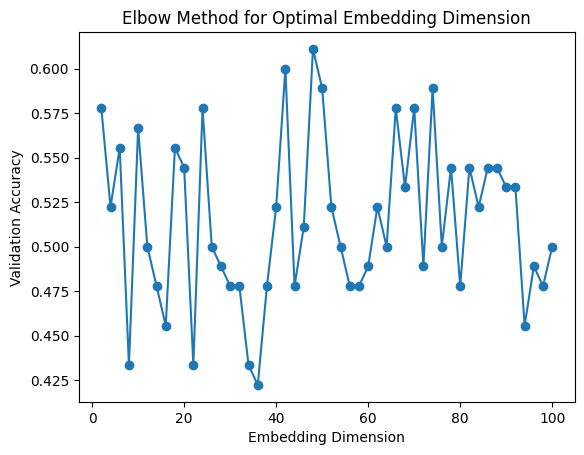

In [178]:
'''
# Training Models and Elbow Method
performances = []

# 6 mninutes
for dim in tqdm(embedding_dims, desc='Training Models'):
    model = create_model(dim, num_categories)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    performances.append(accuracy)

# Plot Reselts
plt.plot(embedding_dims, performances, marker='o')
plt.title('Elbow Method for Optimal Embedding Dimension')
plt.xlabel('Embedding Dimension')
plt.ylabel('Validation Accuracy')
plt.show()
'''

## Encoding "Name" Label

In [160]:
df_embeddings = df.copy()

In [161]:
# Feature Hashing
label_encoder = LabelEncoder()
df_embeddings['name_encoded'] = label_encoder.fit_transform(df_embeddings['name'])
df.head()

,id,name
0,212,Tor
1,91,cryptomining
2,94,CannabisCollective
3,100,DNMSourcing
4,9,murderhomelesspeople


### TensorFlow Encoding

In [162]:
# Parameters for embeddings
num_categories = df_embeddings['name_encoded'].nunique()
embedding_dim = 10

# Define Model
input_cat = Input(shape=(1,), name='category_input')
embedding = Embedding(input_dim=num_categories, output_dim=embedding_dim, name='category_embedding')(input_cat)
flatten = Flatten()(embedding)

model = Model(inputs=input_cat, outputs=flatten)
model.compile(optimizer='adam', loss='mse')

# Show Model
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ category_input (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ category_embedding (Embedding)  │ (None, 1, 10)          │         4,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,460 (17.42 KB)

 Trainable params: 4,460 (17.42 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# Dummy target
X_train = df_embeddings['name_encoded'].values
y_train = np.random.randn(len(df_embeddings), embedding_dim)

# Fitting model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0209  
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0032
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0151 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.9994
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0100 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0007 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9809 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.9961
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9943 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9752 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0017  
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9530 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9835 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.9482
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/st

In [164]:
X_train.shape, y_train.shape

((446,), (446, 10))

In [165]:
# Obtaining embeddings
def get_embedding(category_index):
    return model.get_layer('category_embedding').get_weights()[0][category_index]

# Apply function
df_embeddings['embedding'] = df_embeddings['name_encoded'].apply(get_embedding)
df_embeddings

,id,name,name_encoded,embedding
0,212,Tor,313,"[-0.35407454, 0.3598881, 0.34813613, -0.335547..."
1,91,cryptomining,365,"[-0.33171546, 0.22584687, -0.3087952, 0.382553..."
2,94,CannabisCollective,40,"[-0.119531594, -0.3099547, -0.37801704, 0.3152..."
3,100,DNMSourcing,76,"[-0.28580028, 0.33507183, -0.34908584, 0.21665..."
4,9,murderhomelesspeople,407,"[-0.39018354, -0.2822243, 0.3670087, 0.229632,..."
...,...,...,...,...
441,393,VendorShitList,328,"[-0.30596986, -0.38135839, -0.3760349, -0.0765..."
442,169,VendorReviews,327,"[-0.30205706, -0.36479327, 0.3707684, -0.37718..."
443,306,TheFamilyGuy,303,"[-0.19442251, -0.3868455, 0.3539038, 0.2811414..."
444,329,CanadaHQ,38,"[0.13914256, 0.28199512, 0.0056601902, -0.3686..."


In [180]:
df_embeddings.to_csv(f"{PATH}FeatureEngineeringData/Boards/boards_embeddings.csv", index=False)

In [181]:
df_embeddings.drop(columns=['name','name_encoded'], inplace=True)

In [182]:
df_embeddings.to_csv(f"{PATH}FeatureEngineeringData/Boards/boards_embeddings_2col.csv", index=False)